# Narrow and Wide Tables

## Dimensions and Axes

- In physics, a **dimension** is a physical quantity that can be measured.
- In math, an **axis** is a line in relation to which a curve or figure is drawn, measured, rotated, etc.
- A **coordinate system** is a collection of one or more axes, typically arranged orthogonally.
  - Dimensions are represented by the axes in a coordinate system.
  - Measurements are represented by values along these axes.
  - Things that have measureable properties are represented by coordinates.

## As Data

- The axes in a two-dimensional **data frame** are its **rows** and **columns**.
  - They are not the same as axes in math.
  - Also, these axes are often called dimensions, which is confusing.
- In a standard, thin or narrow data frame ...
  - each **row** is a coordinate that corresponds to a **thing** (an observation, trial, etc.)
  - each **column** represents a **dimension**, performing the role of an mathematical axis.
- In a properly indexed data frame, the index represents identifying traits of the observation.

## Wide Data Frames

- A thin data frame can be transformed to a wide data frame if the following conditions are met:
  - The data frame has **at least three columns** (including indexes) such that two columns act as indexes and\
  the other stores the values associated with each index combination.
    - The **first** index column will become the **index** of the wide data frame.
    - The **second** index column will become the **columns** of the wide data frame.
    - The **third** column will become the **values** in the cells of the wide data frame. 
  - One of the non-index columns has values that can be projected onto the column axis of a dataframe 
- The wide data frame will have these properties:
  - The column names will correspond to the complete and unique set of values found in the second column.
  - The table itself will only contain data from the first value column.
    - The thin table has, in effect, the potentional to store data for as many wide data frames as it has\
    non-index columns.
  - Many of the resulting cells may be empty, resulting in a **sparse matrix**.
- With Pandas, you can convert a thin to a wide data frame with the `pd.unstack()` method.
  - This requires that you use real indexes for the first two columns.


## Examples

In [1]:
import pandas as pd
import numpy as np

## Example 1

### CORPUS<sub>N</sub>

In [66]:
CORPUS = pd.read_csv("_HIDE/austen-melville-TOKEN2.csv")

In [67]:
CORPUS

,book_id,chap_num,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str
0,158,1,1,0,0,"('Emma', 'NNP')",NNP,Emma,emma
1,158,1,1,0,1,"('Woodhouse,', 'NNP')",NNP,"Woodhouse,",woodhouse
2,158,1,1,0,2,"('handsome,', 'NN')",NN,"handsome,",handsome
3,158,1,1,0,3,"('clever,', 'NN')",NN,"clever,",clever
4,158,1,1,0,4,"('and', 'CC')",CC,and,and
...,...,...,...,...,...,...,...,...,...
2070237,10712,92,23,0,7,"('a', 'DT')",DT,a,a
2070238,10712,92,23,0,8,"('voyage', 'NN')",NN,voyage,voyage
2070239,10712,92,23,0,9,"(""that's"", 'NN')",NN,that's,thats
2070240,10712,92,23,0,10,"('homeward', 'SYM')",SYM,homeward,homeward


In [360]:
CORPUS = CORPUS.set_index(['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num'])

In [361]:
CORPUS

pos_tuple  pos  \
book_id chap_num para_num sent_num token_num                               
158     1        1        0        0                ('Emma', 'NNP')  NNP   
                                   1          ('Woodhouse,', 'NNP')  NNP   
                                   2            ('handsome,', 'NN')   NN   
                                   3              ('clever,', 'NN')   NN   
                                   4                  ('and', 'CC')   CC   
...                                                             ...  ...   
10712   92       23       0        7                    ('a', 'DT')   DT   
                                   8               ('voyage', 'NN')   NN   
                                   9               ("that's", 'NN')   NN   
                                   10           ('homeward', 'SYM')  SYM   
                                   12              ('bound!', 'NN')   NN   

                                               token_str   term_str  
book_id chap_num para_num sent_num token_num                         
158     1        1        0        0                Emma       emma  
                                   1          Woodhouse,  woodhouse  
                                   2           handsome,   handsome  
                                   3             clever,     clever  
                                   4                 and        and  
...                                                  ...        ...  
10712   92       23       0        7                   a          a  
                                   8              voyage     voyage  
                                   9              that's      thats  
                                   10           homeward   homeward  
                                   12             bound!      bound  

[2070242 rows x 4 columns]

### CORPUS<sub>N</sub> &rarr; BOW<sub>N</sub>

In [194]:
# BOW = CORPUS.groupby(['book_id', 'chap_num', 'term_str']).term_str.count().to_frame('tf')

In [371]:
BOW = CORPUS.value_counts(['book_id', 'para_num', 'sent_num', 'term_str']).to_frame('tf').sort_index()

In [372]:
BOW

tf
book_id para_num sent_num term_str        
105     1        0        1806           1
                          a             20
                          about          1
                          acquaintance   1
                          action         1
...                                     ..
53861   326      0        doodle         1
                 1        oo             1
                 2        oo             1
                 3        oo             1
                 4        oo             1

[1250592 rows x 1 columns]

### BOW<sub>N</sub> &rarr; DTM<sub>W</sub>

- Note that the values in a single column are projected onto the column names of the new table.
- This produces many null values that can be converted to 0s.
- The data types for all the columns are the same.

In [385]:
# CORPUS.value_counts?

In [373]:
DTM = BOW.tf.unstack(fill_value=0)

In [374]:
DTM

term_str                   0  1  10  100  1000  10000  1000000  10000000  \
book_id para_num sent_num                                                  
105     1        0         0  0   0    0     0      0        0         0   
                 1         0  0   0    0     0      0        0         0   
                 2         0  0   0    0     0      0        0         0   
                 3         0  0   0    0     0      0        0         0   
                 4         0  0   0    0     0      0        0         0   
...                       .. ..  ..  ...   ...    ...      ...       ...   
53861   326      0         0  0   0    0     0      0        0         0   
                 1         0  0   0    0     0      0        0         0   
                 2         0  0   0    0     0      0        0         0   
                 3         0  0   0    0     0      0        0         0   
                 4         0  0   0    0     0      0        0         0   

term_str                   10440  10800  ...  zoroaster  zozo  zuma  zur  à  \
book_id para_num sent_num                ...                                  
105     1        0             0      0  ...          0     0     0    0  0   
                 1             0      0  ...          0     0     0    0  0   
                 2             0      0  ...          0     0     0    0  0   
                 3             0      0  ...          0     0     0    0  0   
                 4             0      0  ...          0     0     0    0  0   
...                          ...    ...  ...        ...   ...   ...  ... ..   
53861   326      0             0      0  ...          0     0     0    0  0   
                 1             0      0  ...          0     0     0    0  0   
                 2             0      0  ...          0     0     0    0  0   
                 3             0      0  ...          0     0     0    0  0   
                 4             0      0  ...          0     0     0    0  0   

term_str                   æneas  æniad  æson  æsops  ł20000  
book_id para_num sent_num                                     
105     1        0             0      0     0      0       0  
                 1             0      0     0      0       0  
                 2             0      0     0      0       0  
                 3             0      0     0      0       0  
                 4             0      0     0      0       0  
...                          ...    ...   ...    ...     ...  
53861   326      0             0      0     0      0       0  
                 1             0      0     0      0       0  
                 2             0      0     0      0       0  
                 3             0      0     0      0       0  
                 4             0      0     0      0       0  

[17394 rows x 40478 columns]

In [375]:
DTM.T

book_id  105                               ... 53861                           \
para_num   1                               ...   322 323 324    325 326         
sent_num     0  1  2  3  4  5  6  7  8  9  ...     0   0   0  1   0   0  1  2   
term_str                                   ...                                  
0            0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
1            0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
10           0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
100          0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
1000         0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
...        ... .. .. .. .. .. .. .. .. ..  ...   ...  ..  .. ..  ..  .. .. ..   
æneas        0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
æniad        0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
æson         0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
æsops        0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   
ł20000       0  0  0  0  0  0  0  0  0  0  ...     0   0   0  0   0   0  0  0   

book_id         
para_num        
sent_num  3  4  
term_str        
0         0  0  
1         0  0  
10        0  0  
100       0  0  
1000      0  0  
...      .. ..  
æneas     0  0  
æniad     0  0  
æson      0  0  
æsops     0  0  
ł20000    0  0  

[40478 rows x 17394 columns]

In [376]:
DTM.T.sum().to_frame('tf')

tf
book_id para_num sent_num     
105     1        0         969
                 1         649
                 2         354
                 3         218
                 4         137
...                        ...
53861   326      0           4
                 1           1
                 2           1
                 3           1
                 4           1

[17394 rows x 1 columns]

### DTM<sub>W</sub> &rarr; VOCAB<sub>N</sub>

In [359]:
# VOCAB = DTM[[col for col in DTM.columns if 'e' not in col]].sum().to_frame('cf')
VOCAB = DTM.sum().to_frame('cf')
VOCAB['p'] = VOCAB.cf / VOCAB.cf.sum()
VOCAB['i'] = np.log2(1/VOCAB.p)

In [358]:
VOCAB.sample(10)

,cf,p,i
term_str,,,
tips,5,4.269738e-06,17.837421
cartloads,1,8.539476e-07,20.159349
bilocular,1,8.539476e-07,20.159349
orthodoxy,2,1.707895e-06,19.159349
roosting,2,1.707895e-06,19.159349
thirst,24,2.049474e-05,15.574387
johnny,1,8.539476e-07,20.159349
amplify,4,3.415791e-06,18.159349
profoundly,27,2.305659e-05,15.404462


### VOCAB<sub>N</sub> &rarr; VOCAB_POS<sub>N</sub>

In [202]:
VOCAB_POS = CORPUS.value_counts(['term_str', 'pos']).to_frame('cf').sort_index()

In [203]:
VOCAB_POS

cf
term_str pos    
0        CD    2
1        CD   17
         NN    1
10       CD    6
100      CD    2
...           ..
æneas    NNP   1
æniad    NN    1
æson     NN    2
æsops    NNS   1
ł20000   NN    1

[88324 rows x 1 columns]

### VOCAB_POS<sub>N</sub> &rarr; TPM<sub>W</sub>

In [204]:
TPM = VOCAB_POS.cf.unstack(fill_value=0)

In [205]:
TPM

pos,$,'',CC,CD,DT,EX,FW,IN,JJ,JJR,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``
term_str,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
æneas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
æniad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
æson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TPM<sub>W</sub> &rarr; VOCAB<sub>N</sub>

In [206]:
VOCAB['max_pos'] = TPM.idxmax(axis=1)

In [207]:
VOCAB

,cf,p,i,max_pos
term_str,,,,
0,2,9.660706e-07,19.981368,CD
1,18,8.694636e-06,16.811443,CD
10,6,2.898212e-06,18.396405,CD
100,2,9.660706e-07,19.981368,CD
1000,2,9.660706e-07,19.981368,CD
...,...,...,...,...
æneas,1,4.830353e-07,20.981368,NNP
æniad,1,4.830353e-07,20.981368,NN
æson,2,9.660706e-07,19.981368,NN


## Example 2

### AIRBNB

In [339]:
AIRBNB = pd.read_csv("_HIDE/airbnb.csv", sep="|")

In [139]:
AIRBNB

,doc_key,doc_title,doc_date,doc_year,doc_month,doc_country,doc_label,doc_price,doc_rating,doc_content,doc_original
0,375799,"United Kingdom, New Malden, 2015-09-02",2015-09-02,2015,9,United Kingdom,New Malden,80,98.0,"Comfortable, 1 Bedroom Apartment On quiet stre...","Comfortable, 1 Bedroom Apartment On quiet stre..."
1,2284438,"United Kingdom, Kingston upon Thames, 2015-09-02",2015-09-02,2015,9,United Kingdom,Kingston upon Thames,43,97.0,The room is in a modern 1 bedroom flat with of...,The room is in a modern 1 bedroom flat with of...
2,4356007,"United Kingdom, Kingston upon Thames, 2015-09-02",2015-09-02,2015,9,United Kingdom,Kingston upon Thames,325,100.0,Our family home offers 2 double bedrooms with ...,Our family home offers 2 double bedrooms with ...
3,7031432,"United Kingdom, Kingston upon Thames, 2015-09-02",2015-09-02,2015,9,United Kingdom,Kingston upon Thames,47,NaN,The is a basic ground floor bedroom in a recen...,The is a basic ground floor bedroom in a recen...
4,7208109,"United Kingdom, New Malden, 2015-09-02",2015-09-02,2015,9,United Kingdom,New Malden,25,NaN,"This room has a ensuite shower room, wardrobe,...","This room has a ensuite shower room, wardrobe,..."
...,...,...,...,...,...,...,...,...,...,...,...
89296,5196195,"United States, San Francisco, 2015-09-02",2015-09-02,2015,9,United States,San Francisco,120,87.0,This spacious room fits up to 2 adults comfort...,This spacious room fits up to 2 adults comfort...
89297,8115380,"United States, Daly City, 2015-09-02",2015-09-02,2015,9,United States,Daly City,90,NaN,Located in Daly City in a quiet neighborhood w...,Located in Daly City in a quiet neighborhood w...
89298,7886326,"United States, Daly City, 2015-09-02",2015-09-02,2015,9,United States,Daly City,65,NaN,Quiet location with fantastic view. Beautiful ...,Quiet location with fantastic view. Beautiful ...
89299,7025631,"United States, Daly City, 2015-09-02",2015-09-02,2015,9,United States,Daly City,98,100.0,This room accommodates three people. Perfect f...,This room accommodates three people. Perfect f...


### Price / Rating

In [243]:
PRICE_RATING = AIRBNB.value_counts(['doc_price','doc_rating']).to_frame('n').sort_index()

In [244]:
PRICE_RATING

n
doc_price doc_rating   
0         93.0        1
          100.0       1
1         60.0        2
          67.0        1
          78.0        1
...                  ..
999       94.0        1
          95.0        1
          97.0        1
          99.0        1
          100.0       4

[6354 rows x 1 columns]

In [245]:
PRICE_RATING['p'] = PRICE_RATING.n / PRICE_RATING.n.sum()
PRICE_RATING['i'] = np.log2(1/PRICE_RATING.p)
PRICE_RATING['h'] = PRICE_RATING.p * PRICE_RATING.i

In [246]:
PRICE_RATING.sort_values('h', ascending=False)

n         p          i         h
doc_price doc_rating                                    
100       100.0       535  0.008337   6.906239  0.057578
60        100.0       495  0.007714   7.018349  0.054138
50        100.0       493  0.007683   7.024190  0.053964
70        100.0       471  0.007340   7.090051  0.052039
75        100.0       462  0.007200   7.117885  0.051245
...                   ...       ...        ...       ...
196       97.0          1  0.000016  15.969634  0.000249
          100.0         1  0.000016  15.969634  0.000249
198       99.0          1  0.000016  15.969634  0.000249
57        78.0          1  0.000016  15.969634  0.000249
59        20.0          1  0.000016  15.969634  0.000249

[6354 rows x 4 columns]

### Price / Rating Count Matrix

In [291]:
PRM_n = PRICE_RATING.n.unstack(fill_value=0)

In [292]:
PRM_n

doc_rating,20.0,27.0,30.0,31.0,33.0,37.0,40.0,43.0,44.0,45.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
doc_price,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,3,2,8,0,11,5,5,11,2,67
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
995,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,5
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Plots

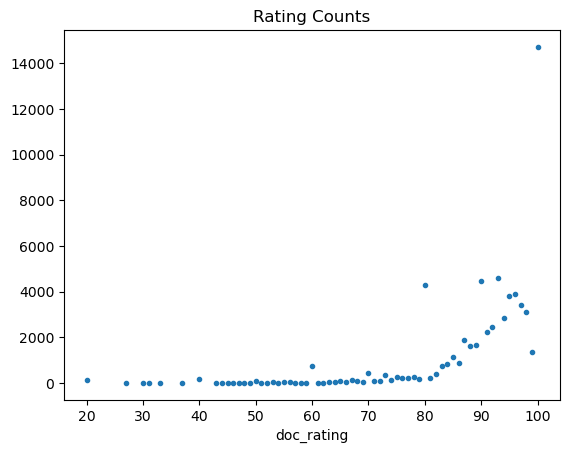

In [249]:
PRM_n.sum().plot(style='.', title="Rating Counts");

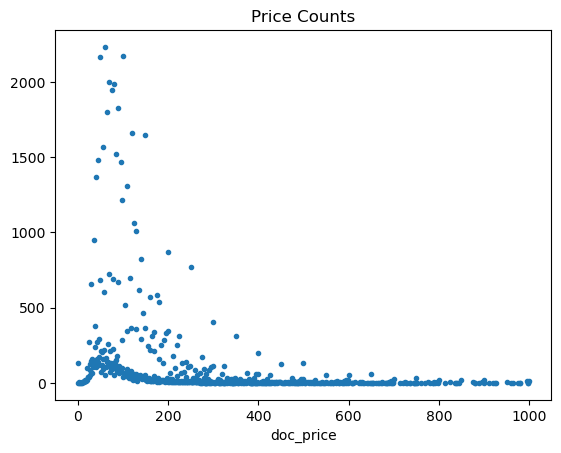

In [250]:
PRM_n.sum(1).plot(style='.', title="Price Counts");

### Price / Rating Entropy Matrix

In [345]:
PRICE_RATING

n         p          i         h
doc_price doc_rating                                  
0         93.0        1  0.000016  15.969634  0.000249
          100.0       1  0.000016  15.969634  0.000249
1         60.0        2  0.000031  14.969634  0.000467
          67.0        1  0.000016  15.969634  0.000249
          78.0        1  0.000016  15.969634  0.000249
...                  ..       ...        ...       ...
999       94.0        1  0.000016  15.969634  0.000249
          95.0        1  0.000016  15.969634  0.000249
          97.0        1  0.000016  15.969634  0.000249
          99.0        1  0.000016  15.969634  0.000249
          100.0       4  0.000062  13.969634  0.000871

[6354 rows x 4 columns]

In [346]:
PRM_h = PRICE_RATING.h.unstack(fill_value=0)

In [347]:
PRM_h

doc_rating,20.0,27.0,30.0,31.0,33.0,37.0,40.0,43.0,44.0,45.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
doc_price,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000249
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000672,0.000467,0.001617,0.000000,0.002144,0.001063,0.001063,0.002144,0.000467,0.010340
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000249,0.000871
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000249
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000249
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000249,0.000000,0.000000,0.000000,0.000249,0.000249,0.000000,0.000000,0.001063
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000249


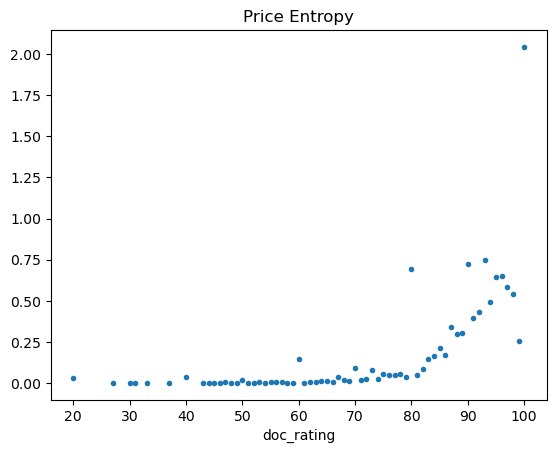

In [304]:
PRM_h.sum().plot(style='.', title="Price Entropy");

### Price / Rating Probability Matrices

In [331]:
PRM_p = (PRM_n.T / PRM_n.T.sum()).T

In [332]:
PRM_p

doc_rating,20.0,27.0,30.0,31.0,33.0,37.0,40.0,43.0,44.0,45.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
doc_price,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022901,0.015267,0.061069,0.000000,0.083969,0.038168,0.038168,0.083969,0.015267,0.511450
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.571429
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.500000
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [326]:
PRICE_RATING.p.unstack(fill_value=0)

doc_rating,20.0,27.0,30.0,31.0,33.0,37.0,40.0,43.0,44.0,45.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
doc_price,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000047,0.000031,0.000125,0.000000,0.000171,0.000078,0.000078,0.000171,0.000031,0.001044
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016,0.000062
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000016,0.000000,0.000000,0.000000,0.000016,0.000016,0.000000,0.000000,0.000078
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016


Why are the preceding two tables different?

The first is the conditional probability of the rating given the price.

In [334]:
PRM_p.sum(1)

doc_price
0      1.0
1      1.0
2      1.0
3      1.0
5      1.0
      ... 
980    1.0
995    1.0
997    1.0
998    1.0
999    1.0
Length: 580, dtype: float64

The second is the joint probability of price and rating.

In [337]:
PRICE_RATING.p.unstack(fill_value=0).sum().sum()

1.0000000000000013

### Country / Price Count Matrix

In [305]:
CPM = AIRBNB.value_counts(['doc_country', 'doc_price']).unstack(fill_value=0)

In [306]:
CPM

doc_price,0,1,2,3,4,5,7,9,10,12,...,979,980,985,987,990,993,995,997,998,999
doc_country,,,,,,,,,,,,,,,,,,,,,
France,0,18,5,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
Mexico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
United Kingdom,0,19,2,0,0,2,2,0,7,5,...,0,0,0,0,0,0,0,0,0,0
United States,2,276,53,15,6,4,1,2,10,1,...,0,4,1,1,0,1,16,1,1,19
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Country

In [307]:
COUNTRY = CPM.sum(1).to_frame('n')

In [308]:
COUNTRY

,n
doc_country,
France,35427
Mexico,1
United Kingdom,25361
United States,28509
Vanuatu,1


In [279]:
COUNTRY['mean_price'] = AIRBNB.groupby('doc_country').doc_price.mean().round(2)

In [280]:
COUNTRY

,n,mean_price
doc_country,,
France,35427,99.93
Mexico,1,750.00
United Kingdom,25361,99.52
United States,28509,159.72
Vanuatu,1,110.00


In [311]:
AIRBNB.groupby(['doc_country']).doc_price.median()

doc_country
France             80.0
Mexico            750.0
United Kingdom     80.0
United States     124.0
Vanuatu           110.0
Name: doc_price, dtype: float64

In [314]:
COUNTRY_PRICE

doc_price,0,1,2,3,4,5,7,9,10,12,...,979,980,985,987,990,993,995,997,998,999
doc_country,,,,,,,,,,,,,,,,,,,,,
France,0,18,5,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
Mexico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
United Kingdom,0,19,2,0,0,2,2,0,7,5,...,0,0,0,0,0,0,0,0,0,0
United States,2,276,53,15,6,4,1,2,10,1,...,0,4,1,1,0,1,16,1,1,19
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
